In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
# ! pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the DataFrame from the CSV file
merged_df = pd.read_csv('merged_df.csv')

In [2]:
value_counts = merged_df['label'].value_counts()

# Count the Russian and Western entries
r_count = value_counts.get(1)
w_count = value_counts.get(0)
print("Russian tweets (label = 1):", r_count, ". ", "Western tweets:", w_count, "(label = 0)")

Russian tweets (label = 1): 22597 .  Western tweets: 16722 (label = 0)


In [3]:
# Create a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment
def get_sentiment(tweet):
    return analyzer.polarity_scores(tweet)['compound']

# Apply the function to the 'tweet' column
merged_df['sentiment'] = merged_df['tweet'].apply(get_sentiment)
#print(merged_df.head())

# Compare average sentiment by source
average_sentiment_by_source = merged_df.groupby('label')['sentiment'].mean()
print(average_sentiment_by_source)

label
0   -0.12421
1   -0.03667
Name: sentiment, dtype: float64


In [4]:
# Split the DataFrame into two subsets based on the 'Russian' column
df_r = merged_df[merged_df['label'] == 1]
df_w = merged_df[merged_df['label'] == 0]
 
# Count positive, negative, and neutral sentiment western entries
positive_count_w = (df_w['sentiment'] >= 0.1).sum()
negative_count_w = (df_w['sentiment'] <= -0.1).sum()
neutral_count_w = w_count - negative_count_w - positive_count_w
null_count_w = (df_w['sentiment'] == 0).sum()

# Count positive, negative, and neutral sentiment western entries
positive_count_r = (df_r['sentiment'] >= 0.1).sum()
negative_count_r = (df_r['sentiment'] <= -0.1).sum()
neutral_count_r = r_count - negative_count_r - positive_count_r
null_count_r = (df_r['sentiment'] == 0).sum()

# Calculating percentage 
def percentage(sentiment_count, label):
    
    if label == "R": percentage = round(sentiment_count*100/r_count,2)
    elif label == "W": percentage = round(sentiment_count*100/w_count,2)
    else: raise Exception('Label should be "R" or "W"')
    return percentage
 
positive_count_ratio_w = percentage(positive_count_w, 'W')
negative_count_ratio_w = percentage(negative_count_w, 'W')
neutral_count_ratio_w = percentage(neutral_count_w, 'W')
positive_count_ratio_r = percentage(positive_count_r, 'R')
negative_count_ratio_r = percentage(negative_count_r, 'R')
neutral_count_ratio_r = percentage(neutral_count_r, 'R')

# Print the results - Western
print("SENTIMENT ANALYSIS RESULTS FOR WESTERN TWEETS:")
print(f"Positive sentiments for Western tweets: {positive_count_w}, ({positive_count_ratio_w}% of total Western tweets)")
print(f"Negative sentiments for Western tweets: {negative_count_w}, ({negative_count_ratio_w}% of total Western tweets)")
print(f"Neutral sentiments for Western tweets: {neutral_count_w} ({neutral_count_ratio_w}% of total Western tweets), out of which {null_count_w} have sentiment equal to 0")
print(" ")

# Print the results - Russian
print("SENTIMENT ANALYSIS RESULTS FOR RUSSIAN TWEETS:")
print(f"Positive sentiments for Russian tweets: {positive_count_r}, ({positive_count_ratio_r}% of total Russian tweets)")
print(f"Negative sentiments for Russian tweets: {negative_count_r}, ({negative_count_ratio_r}% of total Russian tweets")
print(f"Neutral sentiments for Russian tweets: {neutral_count_r} ({neutral_count_ratio_r}% of total Russian tweets), out of which {null_count_r} have sentiment equal to 0")


SENTIMENT ANALYSIS RESULTS FOR WESTERN TWEETS:
Positive sentiments for Western tweets: 3468, (20.74% of total Western tweets)
Negative sentiments for Western tweets: 6648, (39.76% of total Western tweets)
Neutral sentiments for Western tweets: 6606 (39.5% of total Western tweets), out of which 6082 have sentiment equal to 0
 
SENTIMENT ANALYSIS RESULTS FOR RUSSIAN TWEETS:
Positive sentiments for Russian tweets: 6582, (29.13% of total Russian tweets)
Negative sentiments for Russian tweets: 7708, (34.11% of total Russian tweets
Neutral sentiments for Russian tweets: 8307 (36.76% of total Russian tweets), out of which 7672 have sentiment equal to 0


   Percentage (%)   Region               Sentiment
0           20.74  Western         Positive (>0.1)
1           39.50  Western  Neutral (>-0.1 & <0.1)
2           29.13  Russian         Positive (>0.1)
3           34.11  Russian        Negative (<-0.1)
4           36.76  Russian  Neutral (>-0.1 & <0.1)
5           39.76  Western        Negative (<-0.1)


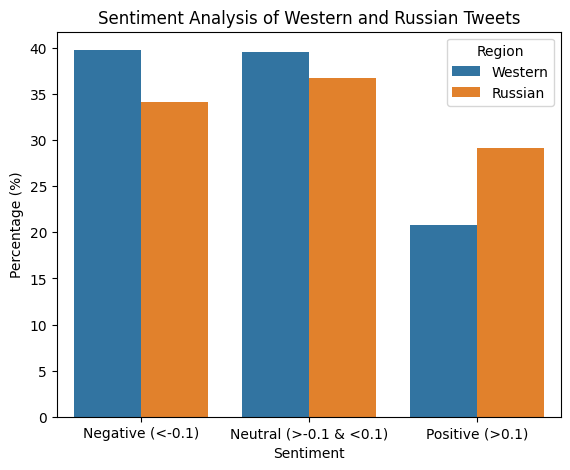

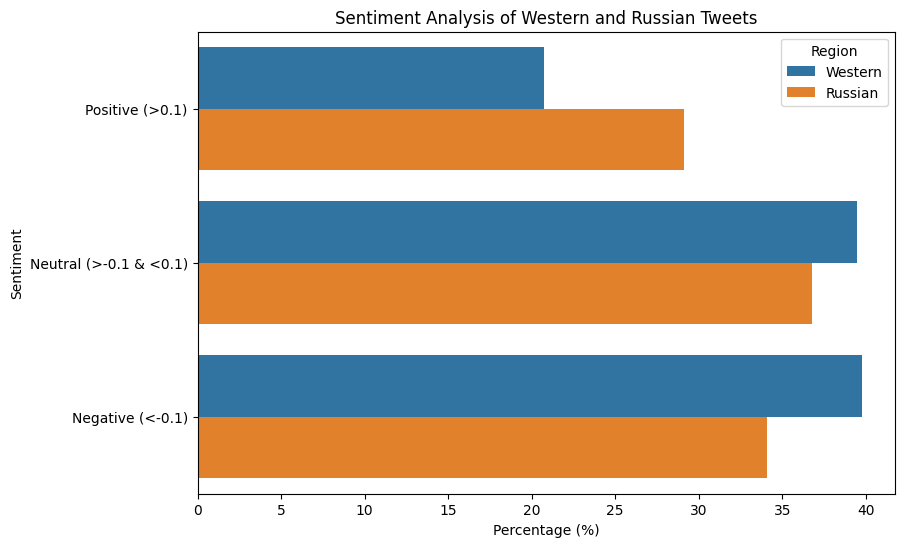

In [5]:
ratios_dict = {
    'Percentage (%)': [positive_count_ratio_w, neutral_count_ratio_w, positive_count_ratio_r, negative_count_ratio_r, neutral_count_ratio_r, negative_count_ratio_w],
    'Region': ["Western","Western","Russian", "Russian", "Russian","Western"],
    'Sentiment': ["Positive (>0.1)", 'Neutral (>-0.1 & <0.1)',"Positive (>0.1)", 'Negative (<-0.1)', 'Neutral (>-0.1 & <0.1)', 'Negative (<-0.1)']
}

# Create the DataFrame
ratios = pd.DataFrame(ratios_dict)
print(ratios)

# Define the order of sentiments for inversion
order = ['Negative (<-0.1)', 'Neutral (>-0.1 & <0.1)', 'Positive (>0.1)']
# Create a bar plot
plt.figure(figsize=(6.5, 5))
sns.barplot(x='Sentiment', y='Percentage (%)', hue='Region', data=ratios, order=order)
# Add titles and labels
plt.title('Sentiment Analysis of Western and Russian Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Percentage (%)')
plt.legend(title='Region')
# Show the plot
plt.show()


# Create a bar plot
plt.figure(figsize=(9, 6))
sns.barplot(y='Sentiment', x='Percentage (%)', hue='Region', data=ratios)
# Add titles and labels
plt.title('Sentiment Analysis of Western and Russian Tweets')
plt.ylabel('Sentiment')
plt.xlabel('Percentage (%)')
plt.legend(title='Region')
# Show the plot
plt.show()


# Correlation between sentiment, likes and retweets
### (All the tweets)

In [6]:
# Defining a function that plots correlation between sentiment and either likes or retweets
def plot_sentiment_corr(data, y, title):

    if y == 'likes_count':
        ylabel = 'Likes'
    elif y == 'retweets_count':
        ylabel = 'Retweets'
    else:
        raise ValueError("y must be either 'likes_count' or 'retweets_count'")    
    plt.figure(figsize=(10, 2.5))
    sns.scatterplot(data = data, y = y, x='sentiment')
    plt.title(title)
    plt.xlabel('Sentiment')
    plt.ylabel(ylabel)
    plt.show()

In [7]:
# Calculate the correlation matrix
correlation_matrix = merged_df[['sentiment', 'likes_count', 'retweets_count']].corr()

# Print the correlation matrix
print("Correlation matrix for sentiment, likes and retweets in all tweets:")
print(correlation_matrix)

# Plotting the correlation between sentiment and likes or retweets
#plot_sentiment_corr(merged_df, 'likes_count', 'Sentiment vs Likes')
#plot_sentiment_corr(merged_df, 'retweets_count', 'Sentiment vs Retweets')


Correlation matrix for sentiment, likes and retweets in all tweets:
                sentiment  likes_count  retweets_count
sentiment        1.000000    -0.074314       -0.096404
likes_count     -0.074314     1.000000        0.925305
retweets_count  -0.096404     0.925305        1.000000


# Correlation between sentiment, likes and retweets
### (Tweets divided by Western and Russian)

Correlation matrix for Russian tweets:
                sentiment  likes_count  retweets_count
sentiment        1.000000    -0.067474       -0.068634
likes_count     -0.067474     1.000000        0.932402
retweets_count  -0.068634     0.932402        1.000000

Correlation matrix for Western Tweets:
                sentiment  likes_count  retweets_count
sentiment        1.000000    -0.073875       -0.107109
likes_count     -0.073875     1.000000        0.923198
retweets_count  -0.107109     0.923198        1.000000


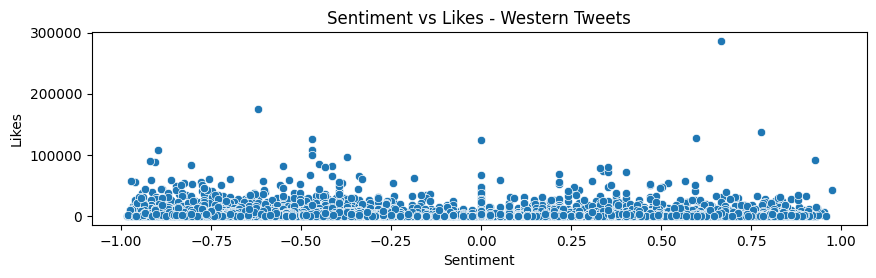

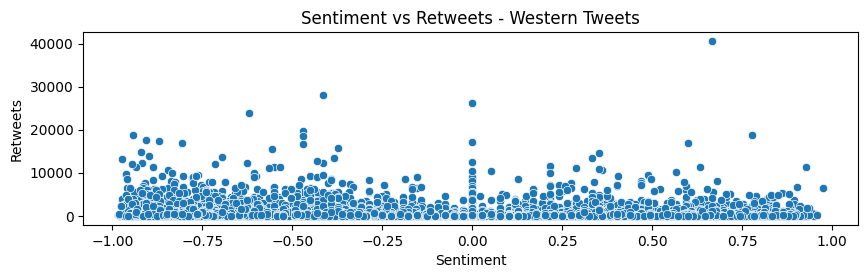

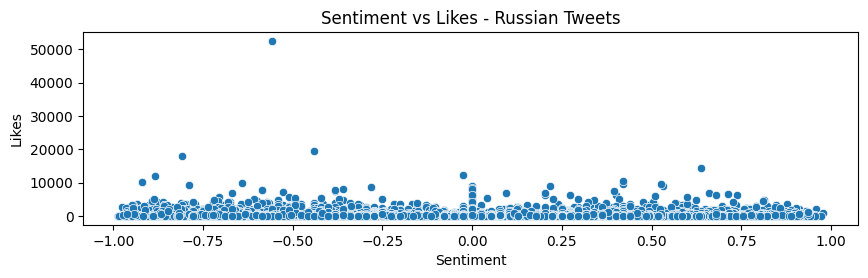

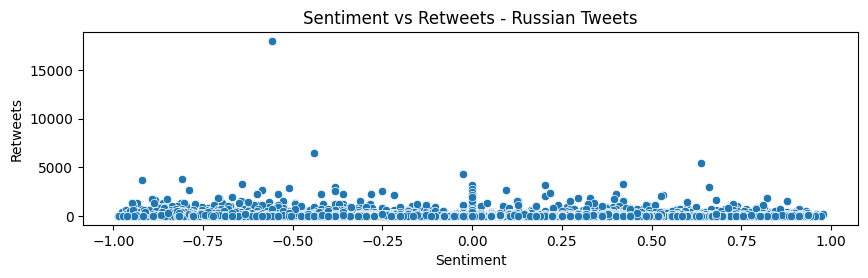

In [8]:
# Calculate the correlation for each subset
correlation_russian = df_r[['sentiment', 'likes_count', 'retweets_count']].corr()
correlation_western = df_w[['sentiment', 'likes_count', 'retweets_count']].corr()

# Display the correlation matrices
print("Correlation matrix for Russian tweets:")
print(correlation_russian)
print("\nCorrelation matrix for Western Tweets:")
print(correlation_western)

# Visualize the relationships using scatter plots, for Western and Russian tweets
plot_sentiment_corr(df_w, 'likes_count', 'Sentiment vs Likes - Western Tweets')
plot_sentiment_corr(df_w, 'retweets_count', 'Sentiment vs Retweets - Western Tweets')
plot_sentiment_corr(df_r, 'likes_count', 'Sentiment vs Likes - Russian Tweets')
plot_sentiment_corr(df_r, 'retweets_count', 'Sentiment vs Retweets - Russian Tweets')

Correlation matrix for Russian tweets (absolute value of sentiment):
                sentiment  likes_count  retweets_count
sentiment        1.000000     0.084115        0.076985
likes_count      0.084115     1.000000        0.932402
retweets_count   0.076985     0.932402        1.000000

Correlation matrix for Western Tweets (absolute value of sentiment):
                sentiment  likes_count  retweets_count
sentiment        1.000000     0.163647        0.183429
likes_count      0.163647     1.000000        0.923198
retweets_count   0.183429     0.923198        1.000000


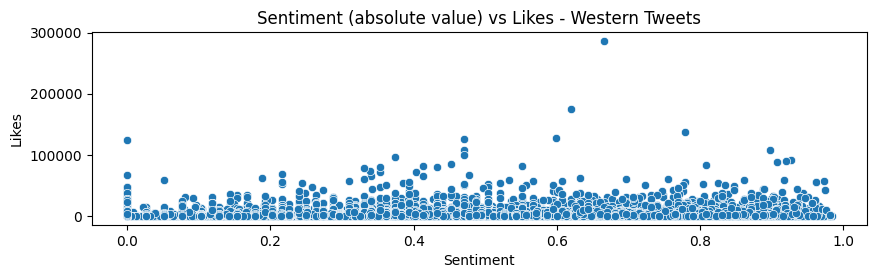

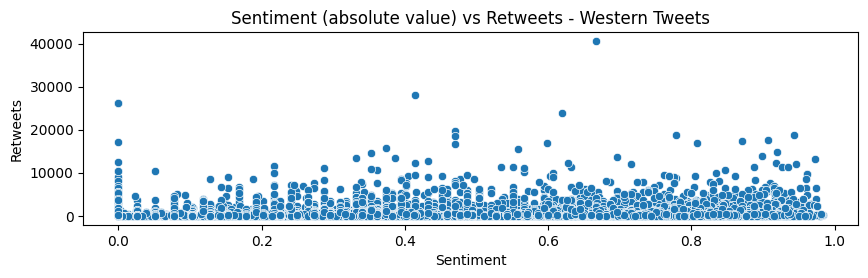

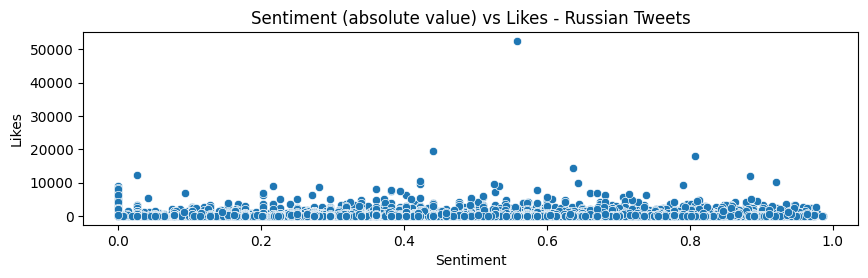

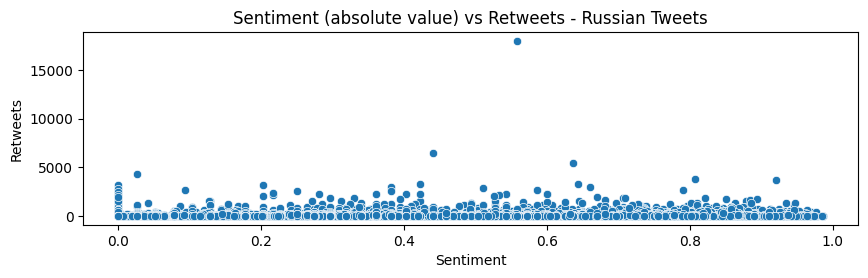

In [9]:
# Create copies of the DataFrames
df_w_copy = df_w.copy()
df_r_copy = df_r.copy()

# Apply absolute operation on the 'sentiment' column of the copied DataFrames
df_w_copy['sentiment'] = df_w_copy['sentiment'].abs()
df_r_copy['sentiment'] = df_r_copy['sentiment'].abs()

# Calculate the correlation for each subset
correlation_russian = df_r_copy[['sentiment', 'likes_count', 'retweets_count']].corr()
correlation_western = df_w_copy[['sentiment', 'likes_count', 'retweets_count']].corr()

# Correlation matrix for absolute value of sentiment
print("Correlation matrix for Russian tweets (absolute value of sentiment):")
print(correlation_russian)
print("\nCorrelation matrix for Western Tweets (absolute value of sentiment):")
print(correlation_western)

# Visualize the relationships using scatter plots, for Western and Russian tweets
plot_sentiment_corr(df_w_copy, 'likes_count', 'Sentiment (absolute value) vs Likes - Western Tweets')
plot_sentiment_corr(df_w_copy, 'retweets_count', 'Sentiment (absolute value) vs Retweets - Western Tweets')
plot_sentiment_corr(df_r_copy, 'likes_count', 'Sentiment (absolute value) vs Likes - Russian Tweets')
plot_sentiment_corr(df_r_copy, 'retweets_count', 'Sentiment (absolute value) vs Retweets - Russian Tweets')

# Evolution of average sentiment in all tweets

In [10]:
# Define a function that creates a line plot to visualize the average sentiment over some dates
def plot_sentiment_change(data, title, color):
    plt.figure(figsize=(10, 3))
    data.plot(kind='line', marker='o', color=color)
    plt.title(title)
    plt.xlabel('date')
    plt.ylabel('Average Sentiment')
    plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    plt.grid(True)
    plt.show()

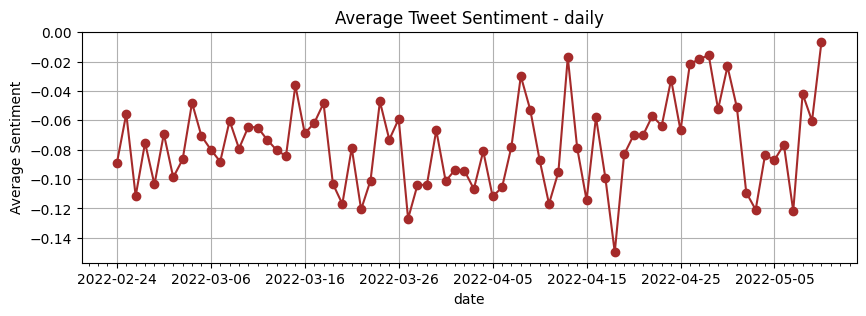

In [11]:
# Group by month and calculate the average sentiment for each month
average_sentiment = merged_df.groupby('date')['sentiment'].mean()
# print(average_sentiment)
# Visualise graph
plot_sentiment_change(average_sentiment, "Average Tweet Sentiment - daily", "brown")

date
2022-02-24   -0.117980
2022-02-25   -0.058482
2022-02-26   -0.154490
2022-02-27   -0.102162
2022-02-28   -0.126499
                ...   
2022-05-06   -0.063504
2022-05-07   -0.174121
2022-05-08   -0.107347
2022-05-09   -0.198741
2022-05-10   -0.153784
Name: sentiment, Length: 76, dtype: float64


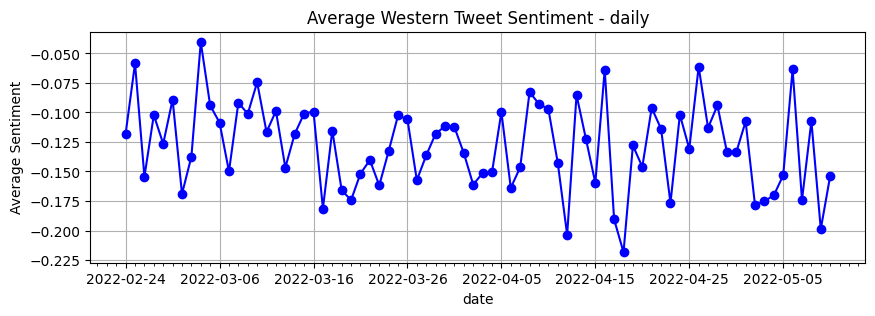

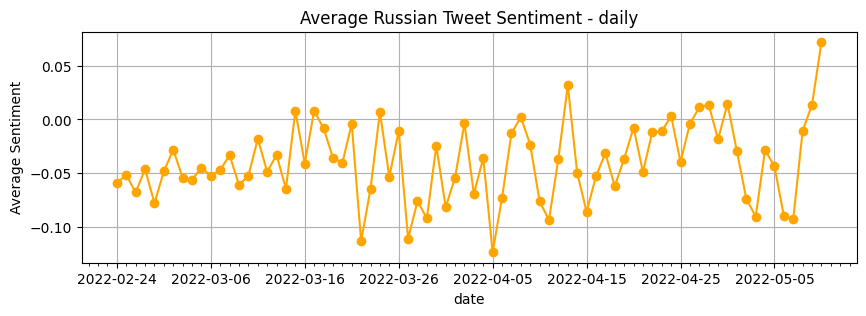

In [12]:
# Group by month and calculate the average sentiment for each month
average_sentiment_w = df_w.groupby('date')['sentiment'].mean()
average_sentiment_r = df_r.groupby('date')['sentiment'].mean()
print(average_sentiment_w)
# print(average_sentiment_r)

# Create a line plot to visualize the average Western and Russian tweet sentiment over time
plot_sentiment_change(average_sentiment_w, "Average Western Tweet Sentiment - daily","b")
plot_sentiment_change(average_sentiment_r, "Average Russian Tweet Sentiment - daily","orange")

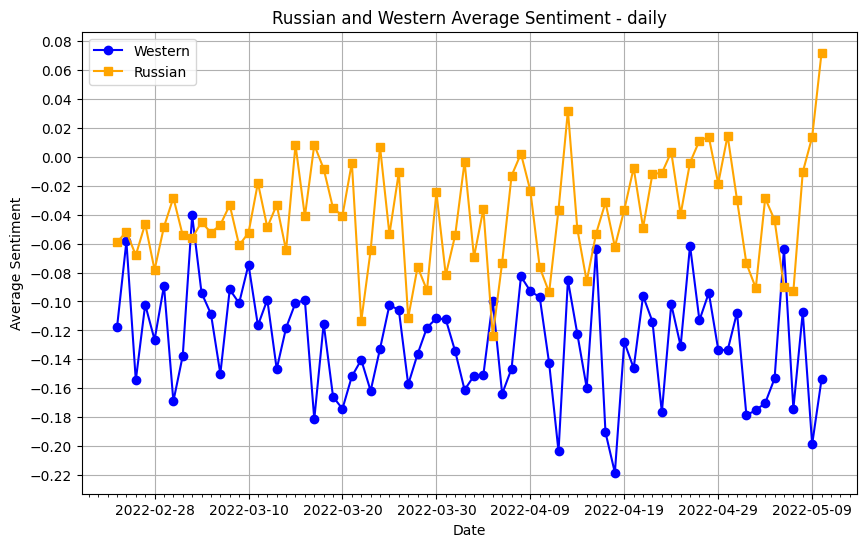

In [13]:
plt.figure(figsize=(10, 6))
# Plot two time series
plt.plot(average_sentiment_w, label='Western', color='blue', marker='o')
plt.plot(average_sentiment_r, label='Russian', color='orange', marker='s')
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.title('Russian and Western Average Sentiment - daily')
plt.legend()
# Set x-axis major and minor locator
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=1))
# Setting y-axis ticks limits and interval
plt.yticks(np.arange(0.08, -0.23, -0.02))
# Show plot
plt.grid(True)
plt.show()

In [14]:
avg_sent_noindex_r = average_sentiment_r.reset_index()
avg_sent_noindex_r.rename(columns={'sentiment': 'sentiment_r'}, inplace=True)
avg_sent_noindex_w = average_sentiment_w.reset_index()
avg_sent_noindex_w.rename(columns={'sentiment': 'sentiment_w'}, inplace=True)
# Merging data about currecencies and Russian sentiment
avg_sent_corr = pd.merge(avg_sent_noindex_w, avg_sent_noindex_r, on='date')
# Calculate the correlation matrix
correlation_matrix_wr = avg_sent_corr[['sentiment_w', 'sentiment_r']].corr()
print("Correlation matrix between Russian and Western sentiment:")
# Print the correlation matrix
print(correlation_matrix_wr)

Correlation matrix between Russian and Western sentiment:
             sentiment_w  sentiment_r
sentiment_w     1.000000     0.028708
sentiment_r     0.028708     1.000000


In [15]:
# Load the DataFrame from the CSV file
exchange_df = pd.read_csv('rouble_exchange_rates.csv')

# Merging data about currecencies and Russian sentiment
sent_ex_r = average_sentiment_r.reset_index()
sent_ex_r = pd.merge(average_sentiment_r, exchange_df, on='date')
# Calculate the correlation matrix
correlation_matrix_r = sent_ex_r[['sentiment', 'rub_eur','rub_usd','rub_gbp']].corr()
# Print the correlation matrix
print("Correlation matrix for Russian sentiment and exchange rates:")
print(correlation_matrix_r)



# Merging data about currecencies and Western sentiment
sent_ex_w = average_sentiment_w.reset_index()
sent_ex_w = pd.merge(sent_ex_w, exchange_df, on='date')
# Calculate the correlation matrix
correlation_matrix_w = sent_ex_w[['sentiment', 'rub_eur','rub_usd','rub_gbp']].corr()

# Print the correlation matrix
print("\nCorrelation matrix for Western sentiment and exchange rates:")
print(correlation_matrix_w)

Correlation matrix for Russian sentiment and exchange rates:
           sentiment   rub_eur   rub_usd   rub_gbp
sentiment   1.000000  0.120976  0.117524  0.126339
rub_eur     0.120976  1.000000  0.994148  0.999212
rub_usd     0.117524  0.994148  1.000000  0.993552
rub_gbp     0.126339  0.999212  0.993552  1.000000

Correlation matrix for Western sentiment and exchange rates:
           sentiment   rub_eur   rub_usd   rub_gbp
sentiment   1.000000 -0.110521 -0.102082 -0.112193
rub_eur    -0.110521  1.000000  0.994148  0.999212
rub_usd    -0.102082  0.994148  1.000000  0.993552
rub_gbp    -0.112193  0.999212  0.993552  1.000000
